# Part II - (PISA2012_Analysis)
## by (Naomi Sidi)

## Investigation Overview
The PISA2012_Analysis project aims to analyse the responses of student's from the PISA 2012 test administered by the OECD.
The objective of this project is twofold: 
1. To find out the top performing countries and their future career choices; and
2. To find out whether a student’s socioeconomic status had an effect on their scores and future career choices.

The following are the key insights from the exploratory visualizations:
1.	China-Shanghai is the top Country for all subjects. Japan, Finland, Singapore, Hong Kong- China, Chinese Taipei and Korea also featured among the top 5 countries in Math, Reading and Science.
2.	A career in Science was the most popular across the board. 
3.	The socioeconomic status affects a student's performance.

## Dataset Overview
In 2012, 510 000 students from 65 countries/economies(both member and partner states) took part in the assessment. The dataset has 485490 responses and 635 variables. for this analysis however, focuses on 7 countries that were in the top 5 category for Math, Reading and Science.

This project is a technical requirement for the Data Analysis Nanodegree offered by Udacity.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('pisa2012.csv', encoding = 'cp1252', index_col = 0) 
#Specify only necessary variables for analysis 
df = df[['CNT', 'ST04Q01', 'ST15Q01', 'ST19Q01', 'ST26Q01', 'IMMIG', 
         'ST26Q02', 'ST26Q03', 'ST26Q04', 'ST26Q05', 'ST26Q06', 
         'ST26Q07', 'ST26Q08', 'ST26Q09', 'ST26Q10', 'ST26Q11', 
         'ST26Q12', 'ST26Q13', 'ST26Q14', 'ST26Q15', 'ST26Q16', 
         'ST26Q17', 'ST27Q01', 'ST27Q02', 'ST27Q03', 'ST27Q04', 
         'ST27Q05', 'ST28Q01', 'ST48Q01', 'ST48Q02', 'ST48Q03', 
         'ST48Q04', 'ST48Q05', 'ST53Q01', 'ST53Q02', 'ST53Q03', 
         'ST53Q04', 'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 
         'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 
         'PV5READ', 'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 
         'PV5SCIE', 'W_FSTUWT']]
#Make a copy of the dataframe before beginning visualization
pisa = df.copy()

## Visualization 1: The Top Five Countries in Math, Reading and Science

China-Shanghai is the top Country for all subjects. Singapore and Hong Kong- China were also among the top 5 in all subjects. Japan and Finland were among the top 5 countries in Reading and Science but not Maths- while Chinese Taipei and Korea are in the top 5 countries in Mathematics but not Reading and Science.

In [3]:
Grouped=pisa.groupby(['CNT', 'ST04Q01']) #Group the dataset by Country and Gender

cols = pisa[['PV1MATH','PV2MATH', 'PV3MATH', 'PV4MATH',
               'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 
               'PV4READ', 'PV5READ', 'PV1SCIE', 'PV2SCIE', 
               'PV3SCIE', 'PV4SCIE', 'PV5SCIE', 'ST04Q01', 
             'ST15Q01', 'ST19Q01', 'ST26Q01', 'ST26Q02', 
             'ST26Q03', 'ST26Q04','ST26Q05', 'ST26Q06',
             'ST26Q07', 'ST26Q08', 'ST26Q09', 'ST26Q10',
             'ST26Q11', 'ST26Q12', 'ST26Q13', 'ST26Q14',
             'ST26Q15', 'ST26Q16', 'ST26Q17', 'ST27Q01', 
             'ST27Q02', 'ST27Q03', 'ST27Q04', 'ST27Q05',
             'ST28Q01', 'ST48Q01', 'ST48Q02', 'ST48Q03',
             'ST48Q04', 'ST48Q05', 'ST53Q01', 'ST53Q02',
             'ST53Q03', 'ST53Q04']]
def weighted(pisa, cols, w='W_FSTUWT'):
             return pd.Series(np.average(pisa[cols], weights=pisa[w], axis=0), cols) #Get weighted average
data1 = Grouped.apply(weighted, ['PV1MATH','PV2MATH', 'PV3MATH', 'PV4MATH',
                         'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 
                         'PV4READ', 'PV5READ', 'PV1SCIE', 'PV2SCIE', 
                         'PV3SCIE', 'PV4SCIE', 'PV5SCIE'])
data1.reset_index(inplace=True)
# combine results from the 5 sets of PVs for each subject
math= data1[['PV1MATH','PV2MATH', 'PV3MATH', 
             'PV4MATH', 'PV5MATH']].to_numpy()
read=data1[['PV1READ','PV2READ', 'PV3READ', 
             'PV4READ', 'PV5READ']].to_numpy()
scie= data1[['PV1SCIE','PV2SCIE', 'PV3SCIE', 
             'PV4SCIE', 'PV5SCIE']].to_numpy()
data1['MATH_FINAL'] = np.mean(math, axis=1)
data1['READ_FINAL'] = np.mean(read, axis=1)
data1['SCIE_FINAL'] = np.mean(scie, axis=1)

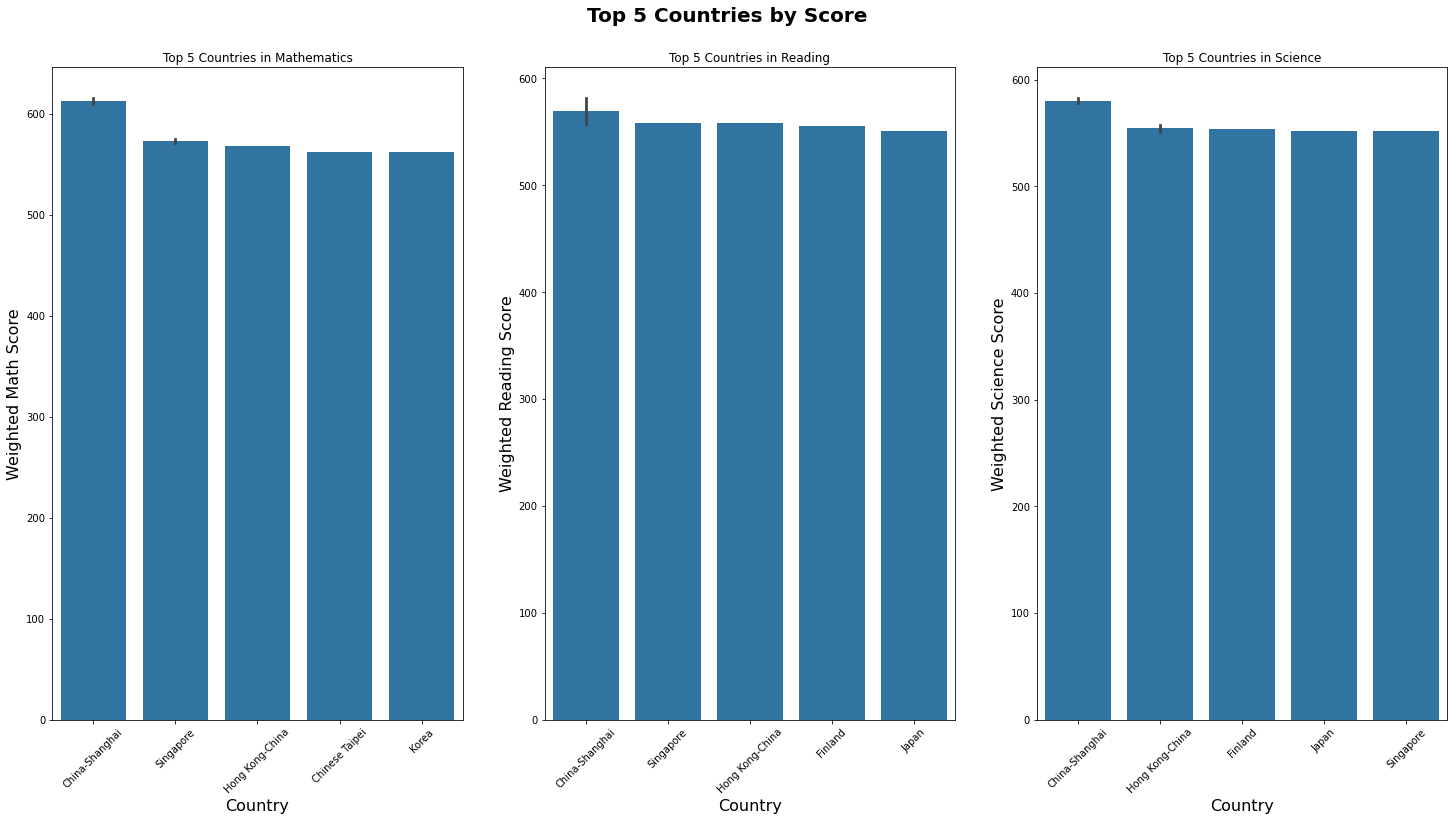

In [4]:
#recereate the subset with the countries of interest
plt.figure(figsize=[25,12])
base_color = sb.color_palette()[0]
yticks = np.arange(0,160000,20000)  

#Plotting the top 5 countries by Math
plt.subplot(1,3,1)        
sb.barplot(
    y='MATH_FINAL',
    x='CNT',
    data=data1.nlargest(7, 'MATH_FINAL'),
    color=base_color
    )
plt.xticks(rotation=45, ha='center')
plt.ylabel('Weighted Math Score', fontsize = 16)
plt.xlabel('Country', fontsize = 16)
plt.title('Top 5 Countries in Mathematics')

#Plotting the top 5 countries by Reading
plt.subplot(1,3,2)          
sb.barplot(
    y='READ_FINAL',
    x='CNT',
    data=data1.nlargest(6, 'READ_FINAL'),
    color=base_color
    )
plt.xticks(rotation=45, ha='center')
plt.ylabel('Weighted Reading Score', fontsize = 16)
plt.xlabel('Country', fontsize = 16)
plt.title('Top 5 Countries in Reading')

#Plotting the top 5 countries by Science
plt.subplot(1,3,3)           
sb.barplot(
    y='SCIE_FINAL',
    x='CNT',
    data=data1.nlargest(7, 'SCIE_FINAL'),
    color=base_color
    )
plt.xticks(rotation=45, ha='center')
plt.ylabel('Weighted Science Score', fontsize = 16)
plt.xlabel('Country', fontsize = 16)
plt.title('Top 5 Countries in Science')

plt.suptitle('Top 5 Countries by Score', 
             x = 0.5, y = 0.95, fontsize = 20, fontweight='bold', color = 'black');

## Visualization 2: The Most Preferred Career Choice

A career in Science is the most preferred for 15 year olds in the top 5 countries. Students in Finland have the highest preference for careers in mathematics even if they do not rank among the first 5 countries in Math Scores, while students from Hong Kong China and China Shanghai scored high in Math but are not very interested in pursuing a career in Math.

In [5]:
#Create a subset of the dataframe with only the top 7 countries of interest
countries_group = pisa.loc[pisa['CNT'].isin(['Finland','Chinese Taipei', 'China-Shanghai',
                                             'Hong Kong-China', 'Singapore', 'Japan', 
                                             'Korea'])]
countries_group.groupby('CNT')
countries_group.head(2)

,CNT,ST04Q01,ST15Q01,ST19Q01,ST26Q01,IMMIG,ST26Q02,ST26Q03,ST26Q04,ST26Q05,...,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,W_FSTUWT
175676,Finland,Male,Working full-time <for pay>,NaN,Yes,Native,Yes,Yes,Yes,No,...,477.1391,505.2071,493.9799,492.3760,573.8903,502.0888,532.8609,580.4178,556.1731,3.4538
175677,Finland,Female,Working part-time <for pay>,"Not working, but looking for a job",Yes,Second-Generation,No,Yes,Yes,No,...,504.5497,560.1514,517.2587,556.1799,451.8277,493.7896,502.1820,519.8993,532.0216,1.1333


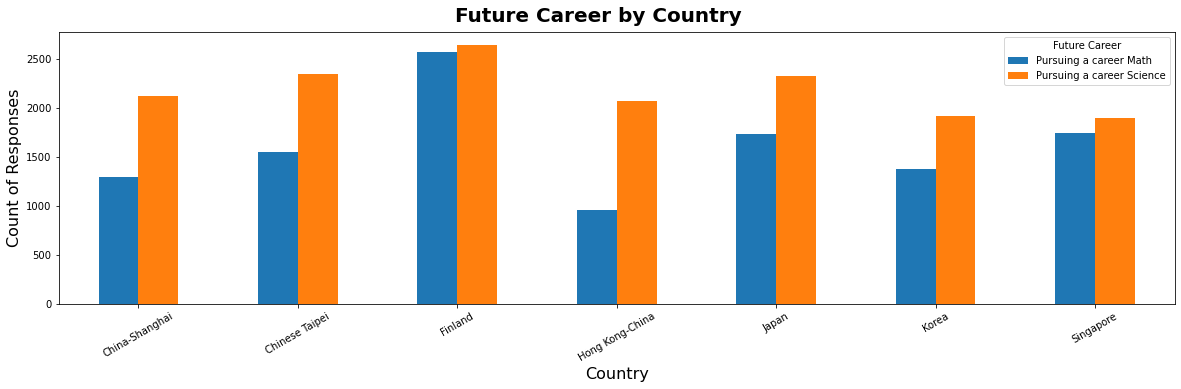

In [6]:
#Create and plot a cross tabulation between career path by country
pursuits_strategy = pd.crosstab(countries_group['CNT'], [countries_group.ST48Q05])
pursuits_strategy.plot(kind='bar', figsize = [20,5])
plt.xlabel('Country', fontsize = 16)
plt.ylabel('Count of Responses', fontsize = 16)
plt.legend(loc='upper right', title='Future Career')
plt.xticks(rotation=30, ha='center')
plt.suptitle('Future Career by Country', 
x = 0.5, y = 0.95, fontsize = 20, fontweight='bold', color = 'black');

## Visualization 3:The Socioeconomic Status Affects a Student's Perfomance

Students from a low socioeconomic background appeared to lag in achievement in comparison to their counterparts. Students with no bathrooms or computers at home scored lower than their counterparts. In addition, students of low socioeconomic status did not seem to show much preference in their future career path.

In [7]:
pisa['MATH_AVG'] = pisa[['PV1MATH', 'PV2MATH','PV3MATH','PV4MATH','PV5MATH']].mean(axis=1)
pisa['READ_AVG'] = pisa[['PV1READ', 'PV2READ','PV3READ','PV4READ','PV5READ']].mean(axis=1)
pisa['SCIE_AVG'] = pisa[['PV1SCIE', 'PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE']].mean(axis=1)
pisa['OVERALL_ACHIE'] = pisa[['MATH_AVG', 'READ_AVG', 'SCIE_AVG' ]].mean(axis=1)

countries_grouped = pisa.loc[pisa['CNT'].isin(['Finland','Chinese Taipei', 'China-Shanghai',
                                             'Hong Kong-China', 'Singapore', 'Japan', 
                                             'Korea'])]

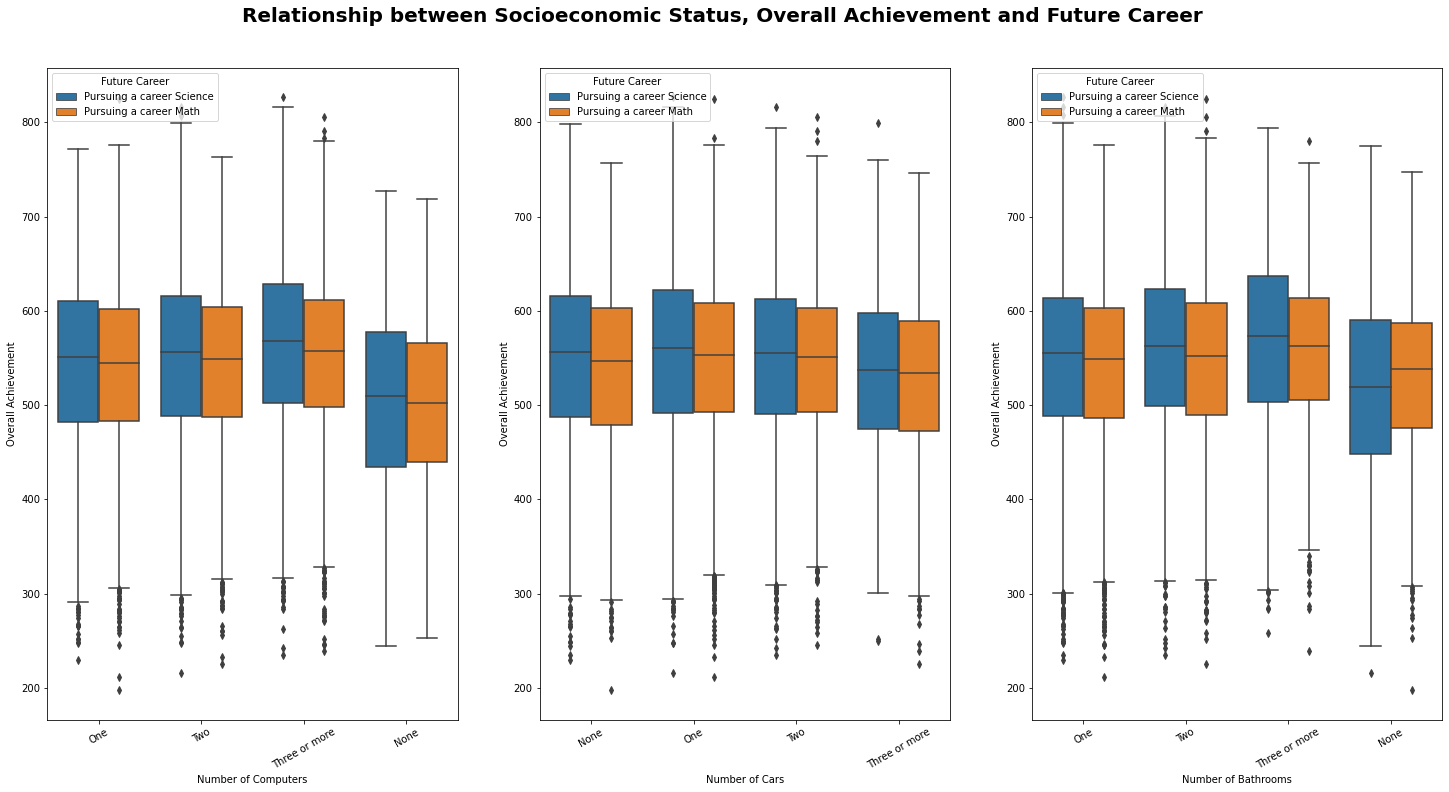

In [8]:
plt.figure(figsize=[25,12]).suptitle('Relationship between Socioeconomic Status, Overall Achievement and Future Career', 
                                     x = 0.5, y = 0.95, fontsize = 20, fontweight='bold', color = 'black')

plt.subplot(1,3,1)
sb.boxplot(data=countries_grouped, x='ST27Q03', 
                y='OVERALL_ACHIE', hue = 'ST48Q05')
plt.legend(loc='upper left', title='Future Career')
plt.xticks(rotation=30, ha='center')
plt.xlabel('Number of Computers')
plt.ylabel('Overall Achievement')

plt.subplot(1,3,2)
sb.boxplot(data=countries_grouped, x='ST27Q04', 
                y='OVERALL_ACHIE', hue = 'ST48Q05')
plt.legend(loc='upper left', title='Future Career')
plt.xticks(rotation=30, ha='center')
plt.xlabel('Number of Cars')
plt.ylabel('Overall Achievement')


plt.subplot(1,3,3)
sb.boxplot(data=countries_grouped, x='ST27Q05', 
                y='OVERALL_ACHIE', hue = 'ST48Q05')
plt.legend(loc='upper left', title='Future Career')
plt.xticks(rotation=30, ha='center')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Overall Achievement');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [9]:
# Use this command if you are running this file in local
!jupyter nbconvert part_II_pisa2012_analysis.ipynb --to slides --post serve --no-input --no-prompt

^C
